In [1]:
import nltk
import pandas as pd

In [2]:
raw_data = pd.read_csv('../data/moneypl_content_2.csv')

In [18]:
raw_data.head()

,headline,category,content,url
0,Mandat na raty. RPO chce zmian ws. wygaszania ...,Finanse,"Kierowcy, którzy spłacają mandat na raty, dłuż...",https://www.money.pl/gospodarka/mandat-na-raty...
1,Domki dla powodzian od Buddy. Zamieszanie wokó...,Powódź,Poszkodowana przez powódź pani Ilona z okolic ...,https://www.money.pl/gospodarka/domki-dla-powo...
2,Hanna Gronkiewicz-Waltz objęła mandat europose...,Prawo,Parlament Europejski w poniedziałek przyjął do...,https://www.money.pl/gospodarka/hanna-gronkiew...
3,Kary dla Hindusa i Dunki. Złamali prawo na Lot...,Prawo,Funkcjonariusze Straży Granicznej interweniowa...,https://www.money.pl/gospodarka/kary-dla-hindu...
4,"Powodzianie szykują pozew zbiorowy. ""Ma udowod...",Gospodarka,W Lewinie Brzeskim trwa zbiórka podpisów pod p...,https://www.money.pl/gospodarka/powodzianie-sz...


In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473 entries, 0 to 9472
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  9473 non-null   object
 1   category  9473 non-null   object
 2   content   9471 non-null   object
 3   url       9473 non-null   object
dtypes: object(4)
memory usage: 296.2+ KB


In [20]:
raw_data.isna().sum()

headline    0
category    0
content     2
url         0
dtype: int64

In [21]:
raw_data.dropna(inplace=True)

In [22]:
raw_data

,headline,category,content,url
0,Mandat na raty. RPO chce zmian ws. wygaszania ...,Finanse,"Kierowcy, którzy spłacają mandat na raty, dłuż...",https://www.money.pl/gospodarka/mandat-na-raty...
1,Domki dla powodzian od Buddy. Zamieszanie wokó...,Powódź,Poszkodowana przez powódź pani Ilona z okolic ...,https://www.money.pl/gospodarka/domki-dla-powo...
2,Hanna Gronkiewicz-Waltz objęła mandat europose...,Prawo,Parlament Europejski w poniedziałek przyjął do...,https://www.money.pl/gospodarka/hanna-gronkiew...
3,Kary dla Hindusa i Dunki. Złamali prawo na Lot...,Prawo,Funkcjonariusze Straży Granicznej interweniowa...,https://www.money.pl/gospodarka/kary-dla-hindu...
4,"Powodzianie szykują pozew zbiorowy. ""Ma udowod...",Gospodarka,W Lewinie Brzeskim trwa zbiórka podpisów pod p...,https://www.money.pl/gospodarka/powodzianie-sz...
...,...,...,...,...
9468,Publikacja Politico. Kreml: To niestworzone bz...,Wojna w Ukrainie,- Przede wszystkim słabo znamy twórczość tego ...,https://prawo.money.pl/aktualnosci/wiadomosci/...
9469,Rehabilitacji lecznicza. NIK: Coraz gorszy dostęp,Nfz,"Na zabiegi czeka coraz więcej osób, kurczy zaś...",https://prawo.money.pl/aktualnosci/wiadomosci/...
9470,Karta Dużej Rodziny. Zobacz gdzie i do czego u...,Prawo,Content not found,http://e-prawnik.pl/wiadomosci/informacje/kart...
9471,Referendum ws. likwidacji straży miejskiej nie...,Straż miejska,Wniosek zawierał błędy - stwierdziła komisja w...,https://prawo.money.pl/aktualnosci/wiadomosci/...


In [23]:
raw_data['category'].value_counts()

category
Prawo                            1511
Wiadomości                        651
Gospodarka                        320
Wybory samorządowe 2014           235
Kraj                              207
                                 ... 
Imigracja w wielkiej brytanii       1
Polska służba zdrowia               1
Senat w polsce                      1
Frog                                1
Agh                                 1
Name: count, Length: 2529, dtype: int64

In [24]:
raw_data['category'].nunique()

2529

In [25]:
raw_data['category'].value_counts().loc[lambda x: x > 20]

category
Prawo                       1511
Wiadomości                   651
Gospodarka                   320
Wybory samorządowe 2014      235
Kraj                         207
Wojna w Ukrainie             115
Praca                         84
Prawo pracy                   83
Podatki                       57
Świat                         44
Rosja                         42
Wybory prezydenckie 2015      40
Handel                        38
Finanse                       37
Usa                           35
Państwo islamskie             35
Amber Gold                    33
Wybory samorządowe            31
Policja                       30
Ukraina                       28
Biznes                        27
Sąd                           27
Francja                       25
Nik                           24
Cba                           24
Uokik                         23
Włochy                        23
Nieruchomości                 22
Sytuacja na ukrainie          22
Porady                        22
I

In [26]:
raw_data['category'].value_counts().loc[lambda x: x > 20].count()

np.int64(38)

In [27]:
trimmed_categories = raw_data['category'].value_counts().loc[lambda x: x > 10].index.tolist()

In [28]:
trimmed_categories

['Prawo',
 'Wiadomości',
 'Gospodarka',
 'Wybory samorządowe 2014',
 'Kraj',
 'Wojna w Ukrainie',
 'Praca',
 'Prawo pracy',
 'Podatki',
 'Świat',
 'Rosja',
 'Wybory prezydenckie 2015',
 'Handel',
 'Finanse',
 'Usa',
 'Państwo islamskie',
 'Amber Gold',
 'Wybory samorządowe',
 'Policja',
 'Ukraina',
 'Biznes',
 'Sąd',
 'Francja',
 'Nik',
 'Cba',
 'Uokik',
 'Włochy',
 'Nieruchomości',
 'Sytuacja na ukrainie',
 'Porady',
 'Izrael',
 'Chiny',
 'Konflikt na ukrainie',
 'Trybunał konstytucyjny',
 'Pkw',
 'Niemcy',
 'Firma',
 'Zus',
 'Porady prawne',
 'Wybory na ukrainie',
 'Polityka',
 'Media',
 'Kodeks pracy',
 'Korea Północna',
 'Sejm',
 'Mobility',
 'Barack Obama',
 'Koronawirus',
 'Władimir putin',
 'Atak na charlie hebdo',
 'Skok',
 'Baza wiedzy',
 'Unia europejska',
 'Energetyka',
 'Walka z terroryzmem',
 'Giełda',
 'Wyniki wyborów samorządowych 2014',
 'Afganistan',
 'Charlie hebdo',
 'Białoruś',
 'Donald tusk',
 'Sądy',
 'Jarosław Kaczyński',
 'Wybory',
 'Roman polański',
 'Wojna z p

In [29]:
trimmed_data = raw_data[raw_data['category'].isin(trimmed_categories)]

In [30]:
# Mapowanie kategorii
category_mapping = {
    'Polityka i Rząd': [
        'Wybory samorządowe 2014', 'Wybory prezydenckie 2015', 'Wybory',
        'Wyniki wyborów samorządowych 2014', 'Pkw', 'Sejm', 'Trybunał konstytucyjny',
        'Polityka', 'Donald tusk', 'Bronisław komorowski', 'Jarosław Kaczyński',
        'Andrzej Duda', 'Unia europejska', 'Nato', 'Cba', 'Nik', 'Zus',
        'Knf', 'Uokik', 'Prawo spadkowe'
    ],
    'Wojny i Konflikty': [
        'Wojna w Ukrainie', 'Konflikt na Ukrainie', 'Sytuacja na Ukrainie',
        'Pomoc dla Ukrainy', 'Wybory na Ukrainie', 'Wojna w Syrii',
        'Wojna z terroryzmem', 'Walka z terroryzmem', 'Wojna z państwem islamskim',
        'Państwo islamskie', 'Walka z dżihadystami', 'Afganistan', 'Rosja',
        'Hiszpania', 'Białoruś', 'Izrael', 'Chiny', 'Francja', 'Korea Północna',
        'Niemcy', 'Włochy', 'Czechy'
    ],
    'Ekonomia i Biznes': [
        'Gospodarka', 'Biznes', 'Firma', 'Finanse', 'Kredyty', 'Podatki',
        'Giełda', 'Amber Gold', 'Handel', 'Nieruchomości', 'Energetyka', 'Orlen'
    ],
    'Prawo i Sprawiedliwość': [
        'Prawo', 'Prawo pracy', 'Kodeks pracy', 'Porady prawne', 'Porady',
        'Sąd', 'Sądy', 'Prokuratura', 'Abw', 'Korupcja', 'Korupcja w Polsce'
    ],
    'Zdrowie i Społeczeństwo': [
        'Zdrowie', 'Koronawirus', 'Nfz', 'Praca', 'Mobility', 'Prawo jazdy', 'Skok'
    ],
    'Świat i Media': [
        'Wiadomości', 'Świat', 'Media', 'Barack Obama', 'Władimir Putin',
        'Atak na Charlie Hebdo', 'Charlie Hebdo', 'Roman Polański',
        'Papież Franciszek', 'Baza wiedzy'
    ]
}

# Odwrócenie mapowania do użycia w .map()
reverse_mapping = {category: key for key, values in category_mapping.items() for category in values}

# Przypisanie nowych kategorii
trimmed_data['general_category'] = trimmed_data['category'].map(reverse_mapping)


C:\Users\kanio\AppData\Local\Temp\ipykernel_26732\842398672.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data['general_category'] = trimmed_data['category'].map(reverse_mapping)


In [31]:
trimmed_data

,headline,category,content,url,general_category
0,Mandat na raty. RPO chce zmian ws. wygaszania ...,Finanse,"Kierowcy, którzy spłacają mandat na raty, dłuż...",https://www.money.pl/gospodarka/mandat-na-raty...,Ekonomia i Biznes
2,Hanna Gronkiewicz-Waltz objęła mandat europose...,Prawo,Parlament Europejski w poniedziałek przyjął do...,https://www.money.pl/gospodarka/hanna-gronkiew...,Prawo i Sprawiedliwość
3,Kary dla Hindusa i Dunki. Złamali prawo na Lot...,Prawo,Funkcjonariusze Straży Granicznej interweniowa...,https://www.money.pl/gospodarka/kary-dla-hindu...,Prawo i Sprawiedliwość
4,"Powodzianie szykują pozew zbiorowy. ""Ma udowod...",Gospodarka,W Lewinie Brzeskim trwa zbiórka podpisów pod p...,https://www.money.pl/gospodarka/powodzianie-sz...,Ekonomia i Biznes
5,Tak Rosja szpiegowała Gruzję. Są nowe informacje,Gospodarka,Rosja przez kilka lat prowadziła szeroko zakro...,https://www.money.pl/gospodarka/tak-rosja-szpi...,Ekonomia i Biznes
...,...,...,...,...,...
9462,Wybory samorządowe. 61 proc. Polaków dobrze oc...,Wybory samorządowe 2014,Na miesiąc przed wyborami pracę samorządowców ...,https://prawo.money.pl/aktualnosci/wiadomosci/...,Polityka i Rząd
9466,"""Polskie obozy koncentracyjne"". Wpadka włoskie...",Wiadomości,To kolejny taki błąd we włoskich mediach mimo ...,https://prawo.money.pl/aktualnosci/wiadomosci/...,Świat i Media
9468,Publikacja Politico. Kreml: To niestworzone bz...,Wojna w Ukrainie,- Przede wszystkim słabo znamy twórczość tego ...,https://prawo.money.pl/aktualnosci/wiadomosci/...,Wojny i Konflikty
9469,Rehabilitacji lecznicza. NIK: Coraz gorszy dostęp,Nfz,"Na zabiegi czeka coraz więcej osób, kurczy zaś...",https://prawo.money.pl/aktualnosci/wiadomosci/...,Zdrowie i Społeczeństwo


In [32]:
trimmed_data['general_category'].value_counts()

general_category
Prawo i Sprawiedliwość     1729
Świat i Media               750
Ekonomia i Biznes           609
Polityka i Rząd             583
Wojny i Konflikty           429
Zdrowie i Społeczeństwo     174
Name: count, dtype: int64

In [33]:
print(len(raw_data))

9471


In [34]:
print(len(trimmed_data))

4825


In [35]:
categories = raw_data['category'].value_counts().loc[lambda x: x > 100].index.tolist()

In [36]:
selected_data = raw_data[raw_data['category'].isin(categories)]

In [37]:
selected_data.to_csv('../data/selected_data.csv', index=False)

## Reduce number of categories by mapping them to general categories

In [40]:
category_map = pd.read_csv('../data/reduced_categories.csv', header=None)

In [41]:
category_map

,0,1
0,Prawo,Polityka i Prawo
1,Wiadomości,Kultura Media i Komunikacja Społeczna
2,Gospodarka,Gospodarka i Finanse
3,Wybory samorządowe 2014,Polityka i Prawo
4,Kraj,Polityka i Prawo
...,...,...
2524,Imigracja w Wielkiej Brytanii,Relacje Międzynarodowe i Bezpieczeństwo
2525,Polska służba zdrowia,Społeczeństwo i Sprawy Socjalne
2526,Senat w Polsce,Polityka i Prawo
2527,Frog,Inne


In [42]:
print(len(category_map))

2529


In [47]:
reduced_categories = raw_data.copy()

In [48]:
# Map categories to general categories based on category_map
reduced_categories['category'] = raw_data['category'].map(dict(category_map.values))

In [49]:
reduced_categories

,headline,category,content,url
0,Mandat na raty. RPO chce zmian ws. wygaszania ...,Gospodarka i Finanse,"Kierowcy, którzy spłacają mandat na raty, dłuż...",https://www.money.pl/gospodarka/mandat-na-raty...
1,Domki dla powodzian od Buddy. Zamieszanie wokó...,Środowisko i Energia,Poszkodowana przez powódź pani Ilona z okolic ...,https://www.money.pl/gospodarka/domki-dla-powo...
2,Hanna Gronkiewicz-Waltz objęła mandat europose...,Polityka i Prawo,Parlament Europejski w poniedziałek przyjął do...,https://www.money.pl/gospodarka/hanna-gronkiew...
3,Kary dla Hindusa i Dunki. Złamali prawo na Lot...,Polityka i Prawo,Funkcjonariusze Straży Granicznej interweniowa...,https://www.money.pl/gospodarka/kary-dla-hindu...
4,"Powodzianie szykują pozew zbiorowy. ""Ma udowod...",Gospodarka i Finanse,W Lewinie Brzeskim trwa zbiórka podpisów pod p...,https://www.money.pl/gospodarka/powodzianie-sz...
...,...,...,...,...
9468,Publikacja Politico. Kreml: To niestworzone bz...,Relacje Międzynarodowe i Bezpieczeństwo,- Przede wszystkim słabo znamy twórczość tego ...,https://prawo.money.pl/aktualnosci/wiadomosci/...
9469,Rehabilitacji lecznicza. NIK: Coraz gorszy dostęp,Społeczeństwo i Sprawy Socjalne,"Na zabiegi czeka coraz więcej osób, kurczy zaś...",https://prawo.money.pl/aktualnosci/wiadomosci/...
9470,Karta Dużej Rodziny. Zobacz gdzie i do czego u...,Polityka i Prawo,Content not found,http://e-prawnik.pl/wiadomosci/informacje/kart...
9471,Referendum ws. likwidacji straży miejskiej nie...,Polityka i Prawo,Wniosek zawierał błędy - stwierdziła komisja w...,https://prawo.money.pl/aktualnosci/wiadomosci/...


In [51]:
reduced_categories['category'].value_counts()

category
Polityka i Prawo                           3834
Relacje Międzynarodowe i Bezpieczeństwo    1826
Gospodarka i Finanse                       1567
Społeczeństwo i Sprawy Socjalne             855
Kultura Media i Komunikacja Społeczna       820
Inne                                        197
Środowisko i Energia                        158
Technologia i Innowacje                      93
Name: count, dtype: int64

In [50]:
reduced_categories.to_csv('../data/reduced_categories_data.csv', index=False)

In [53]:
wrongly_classified = pd.read_csv('../data/wrong_classified_logistic_regression.csv')

In [54]:
wrongly_classified

,headline,content,category,true_label,predicted_label
0,mandat na raty rpo chce zmian ws wygaszania pu...,kierowcy ktorzy splacaja mandat na raty dluzej...,gospodarka i finanse,0,3
1,powodzianie szykuja pozew zbiorowy ma udowodni...,w lewinie brzeskim trwa zbiorka podpisow pod p...,gospodarka i finanse,2,4
2,tak rosja szpiegowala gruzje sa nowe informacje,rosja przez kilka lat prowadzila szeroko zakro...,gospodarka i finanse,4,2
3,spor o polityke migracyjna lewica nie zgodzi s...,nie zgodzimy sie na pomysl tymczasowego zawies...,polityka i prawo,4,2
4,jak cinkciarz poszedl do nbp po pieniadze i li...,grupa conotoxia do ktorej nalezy kantor waluto...,gospodarka i finanse,0,3
...,...,...,...,...,...
703,koniec z bieganiem od urzedu do urzedu ruszaja...,trwa pierwszy etap budowy cusow na temat rozwo...,gospodarka i finanse,1,2
704,sad najwyzszy zdecydowal zgodzil sie z rpo cho...,zakaz zgromadzen powinien zostac wprowadzany w...,polityka i prawo,0,2
705,kupili dom ale sprzedawca sie rozmyslil jest c...,byla umowa przedwstepna wplacilismy tys zl z...,gospodarka i finanse,4,2
706,od dzis nowy bat na dluznikow zajma ci konto w...,content not found,polityka i prawo,1,2


In [65]:
cleaned_data = pd.read_csv('../data/cleaned_data.csv')

In [3]:
import nltk
import ast
import matplotlib.pyplot as plt

In [67]:
cleaned_data['content'] = cleaned_data['content'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [68]:
cat1FD = nltk.FreqDist(word for text in cleaned_data[cleaned_data['category'] == 'gospodarka i finanse']['content'] for word in text)

cat2FD = nltk.FreqDist(word for text in cleaned_data[cleaned_data['category'] == 'polityka i prawo']['content'] for word in text)

cat3FD = nltk.FreqDist(word for text in cleaned_data[cleaned_data['category'] == 'relacje miedzynarodowe i bezpieczenstwo']['content'] for word in text)

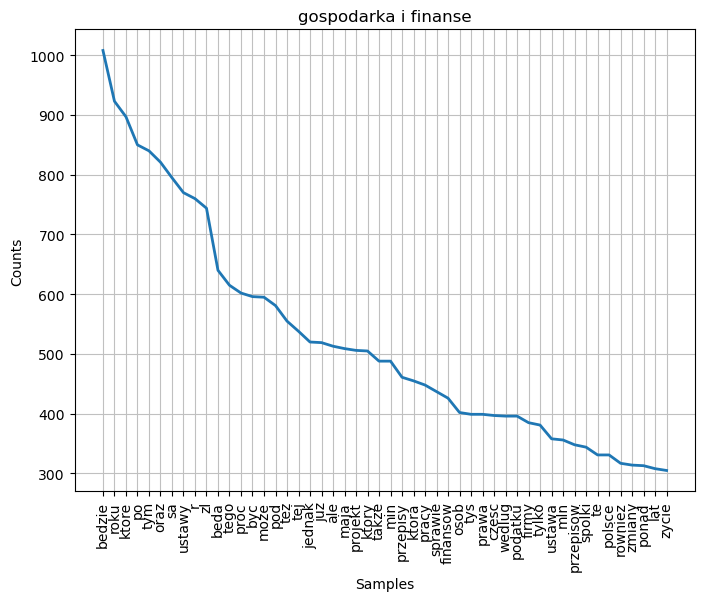

In [69]:
plt.subplots(figsize=(8,6))
plt.title("gospodarka i finanse")
cat1FD.plot(50)
plt.show()

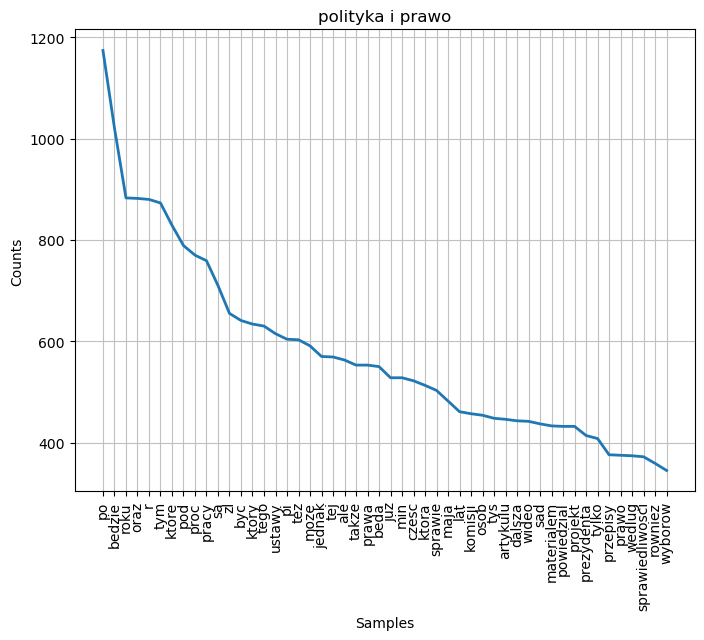

In [70]:
plt.subplots(figsize=(8,6))
plt.title("polityka i prawo")
cat2FD.plot(50)
plt.show()

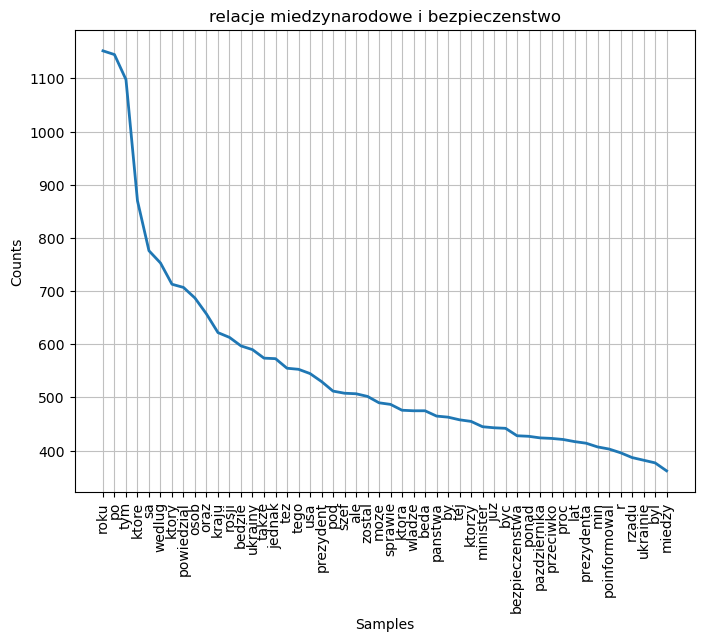

In [71]:
plt.subplots(figsize=(8,6))
plt.title("relacje miedzynarodowe i bezpieczenstwo")
cat3FD.plot(50)
plt.show()

#

In [1]:
import pandas as pd

technologia_urls = pd.read_csv('../data/technologia_urls_3.csv')

In [2]:
technologia_urls['sub_category'].value_counts()

sub_category
Technologia              1197
Militaria                1031
Mobile                     90
Kosmos                     55
Internet                   54
Sztuczna inteligencja      51
Bezpieczeństwo             40
Lotnictwo                  39
Transport                  33
Nauka                      27
PC                         24
Streaming                  19
GeekExtra                  17
Medycyna                   16
Lifestyle                  13
Gadżety                    11
Podróże                     8
Testy                       7
Przyroda                    6
Historia                    6
Ciekawostki                 6
Roboty                      5
Meteorologia                4
Porady                      3
Styl życia                  3
Quizy                       3
Ekotechnologia              3
Aplikacje                   3
Akcesoria                   2
Sztuka                      1
Name: count, dtype: int64

In [3]:
technologia = pd.read_csv('../data/technologia_content.csv')

In [4]:
# joind technologia and technologia_urls on 'url' column without creating duplicates
merged_technologia = pd.merge(technologia, technologia_urls, on=['url', 'headline'], how='inner', copy = True)


In [5]:
technologia_militaria = merged_technologia[merged_technologia['sub_category'].isin(['Technologia', 'Militaria'])]

In [6]:
technologia_militaria['category'] = technologia_militaria['sub_category']

C:\Users\kanio\AppData\Local\Temp\ipykernel_38472\3347599455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  technologia_militaria['category'] = technologia_militaria['sub_category']


In [7]:
technologia_militaria.drop(columns=['sub_category', 'category_x', 'category_y'], inplace=True)

C:\Users\kanio\AppData\Local\Temp\ipykernel_38472\2084647722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  technologia_militaria.drop(columns=['sub_category', 'category_x', 'category_y'], inplace=True)


In [8]:
technologia_militaria

,headline,content,url,category
1,Polska armia coraz silniejsza. Jest umowa na n...,Agencja Uzbrojenia podpisała umowę z konsorcju...,https://geekweek.interia.pl/militaria/news-pol...,Militaria
2,mObywatel i moduł mStłuczka. Kiedy nowa funkcj...,"mObywatel to rządowa aplikacja, która z roku n...",https://geekweek.interia.pl/technologia/news-m...,Technologia
3,"Jedziesz windą i jest awaria. Co robić, gdy za...",Na kanale ratownika medycznego Marcina Borkosi...,https://geekweek.interia.pl/technologia/news-j...,Technologia
6,Tak mogą wyglądać najnowsze czołgi Abrams dla ...,W serwisach społecznościowych pojawiły się pie...,https://geekweek.interia.pl/militaria/news-tak...,Militaria
8,KTO Rosomak w akcji. Polska broń daje popalić ...,Do sieci trafiło widowiskowe nagranie z ostrze...,https://geekweek.interia.pl/militaria/news-kto...,Militaria
...,...,...,...,...
2772,Jak wyczyścić Messenger? Sposób na wszystkie s...,Wysłałeś wiadomość lub zdjęcie na Messengerze ...,https://geekweek.interia.pl/technologia/news-j...,Technologia
2773,Pielęgniarki przyszłości. Każdy pacjent jest d...,Większość egzoszkieletów projektowana jest z m...,https://geekweek.interia.pl/technologia/news-p...,Technologia
2774,Największa na świecie tajna operacja dezinform...,"Meta pochwaliła się, że usunęła tysiące fałszy...",https://geekweek.interia.pl/technologia/news-n...,Technologia
2775,Laptopy dla czwartoklasistów za darmo. Rodzice...,Wraz z początkiem nowego roku szkolnego 2023/2...,https://geekweek.interia.pl/technologia/news-l...,Technologia


In [9]:
wiadomosci = pd.read_csv('../data/wiadomnosci_content.csv')

In [10]:
len(wiadomosci)

5574

In [16]:
sport = pd.read_csv('../data/sport_content_2.csv')

In [17]:
len(sport)

5455

In [18]:
zdrowie = pd.read_csv('../data/zdrowie_content_2.csv')

In [19]:
len(zdrowie)

839

In [20]:
yapping = pd.read_csv('../data/yapping_content_2.csv')

In [21]:
len(yapping)

4997

In [22]:
reduced_categories = pd.read_csv('../data/reduced_categories_data.csv')

In [23]:
reduced_categories['category'].value_counts()

category
Polityka i Prawo                           3834
Relacje Międzynarodowe i Bezpieczeństwo    1826
Gospodarka i Finanse                       1567
Społeczeństwo i Sprawy Socjalne             855
Kultura Media i Komunikacja Społeczna       820
Inne                                        197
Środowisko i Energia                        158
Technologia i Innowacje                      93
Name: count, dtype: int64

In [24]:
technologia_militaria = pd.concat([technologia_militaria, reduced_categories[reduced_categories['category'].isin(['Technologia i Innowacje', 'Relacje Międzynarodowe i Bezpieczeństwo'])]])

In [25]:
technologia_militaria['category'].value_counts()

category
Relacje Międzynarodowe i Bezpieczeństwo    1826
Technologia                                1197
Militaria                                  1031
Technologia i Innowacje                      93
Name: count, dtype: int64

In [26]:
technologia_only = technologia_militaria[technologia_militaria['category'] == 'Technologia']
militaria_only = technologia_militaria[technologia_militaria['category'] == 'Militaria']

In [25]:
sample_amount = 750

technologia_sampled = technologia_only.sample(sample_amount)
militaria_sampled = militaria_only.sample(sample_amount)
wiadomosci_sampled = wiadomosci.sample(sample_amount)
sport_sampled = sport.sample(sample_amount)
zdrowie_sampled = zdrowie.sample(sample_amount)
yapping_sampled = yapping.sample(sample_amount)

sampled_data = pd.concat([technologia_sampled, militaria_sampled, wiadomosci_sampled, sport_sampled, zdrowie_sampled, yapping_sampled])

In [27]:
sampled_data['category'].value_counts()

NameError: name 'sampled_data' is not defined

In [27]:
sampled_data.to_csv('../data/sampled_data.csv', index=False)

In [28]:
# Concatenate all dataframes
all_data = pd.concat([technologia_militaria, wiadomosci, sport, zdrowie, yapping])

In [29]:
all_data['category'].value_counts()

category
wiadomosci                                 5574
sport                                      5455
yapping                                    4997
Relacje Międzynarodowe i Bezpieczeństwo    1826
Technologia                                1197
Militaria                                  1031
zdrowie                                     839
Technologia i Innowacje                      93
Name: count, dtype: int64

In [30]:
# map categories Technologia to technologia and Militaria to militaria
all_data['category'] = all_data['category'].map({'Technologia': 'technologia', 'Militaria': 'militaria', 'sport': 'sport', 'wiadomosci': 'wiadomosci', 'yapping': 'yapping', 'zdrowie': 'zdrowie', 'Relacje Międzynarodowe i Bezpieczeństwo': 'militaria', 'Technologia i Innowacje': 'technologia'})

In [31]:
technologia_bi = pd.read_csv('../data/technologia_content_bi_1.csv')

In [32]:
# concat technologia_bi with all_data
all_data = pd.concat([all_data, technologia_bi])

In [33]:
all_data['category'].value_counts()

category
wiadomosci     5574
sport          5455
yapping        4997
militaria      2857
technologia    2305
zdrowie         839
Name: count, dtype: int64

In [34]:
all_data.to_csv('../data/all_data.csv', index=False)

In [9]:
import pandas as pd

cleaned_data = pd.read_csv('../data/cleaned_data_v2.csv')
# cleaned_data = pd.read_csv('../data/cleaned_data_sampled.csv')
# count avg len of all rows in column content
avg_length = cleaned_data['content'].apply(len).mean()

print(f'Average length of all rows in the content column: {avg_length}')

avg_length_per_category = cleaned_data.groupby('category')['content'].apply(lambda x: x.str.len().mean())

print(avg_length_per_category)

Average length of all rows in the content column: 171.2046
category
militaria      184.092
sport          200.000
technologia    157.552
wiadomosci     160.923
yapping        153.456
Name: content, dtype: float64


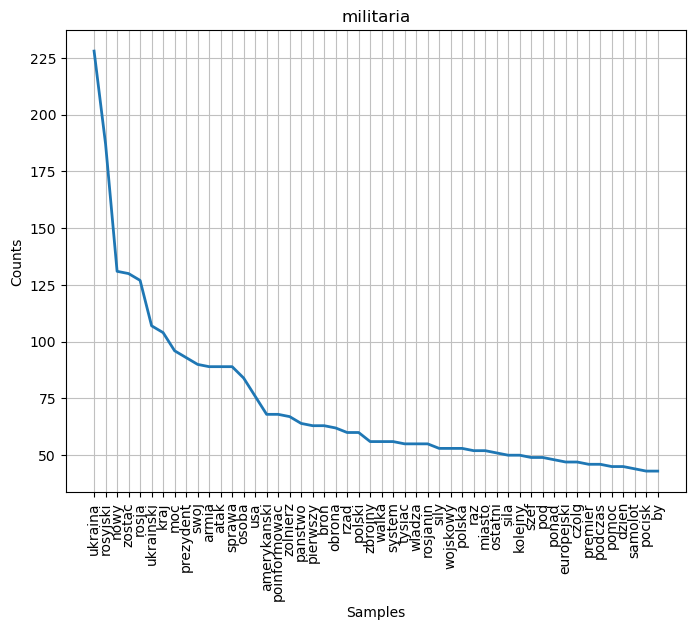

<FreqDist with 6805 samples and 23252 outcomes>


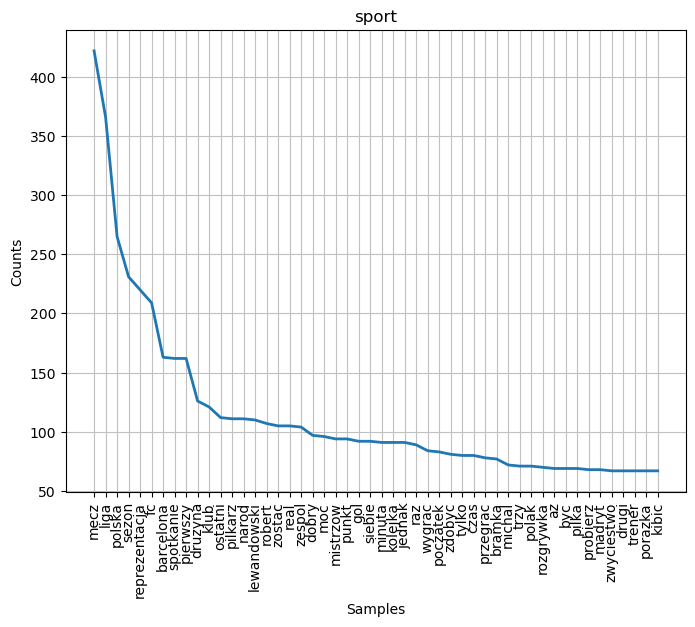

<FreqDist with 5648 samples and 26965 outcomes>


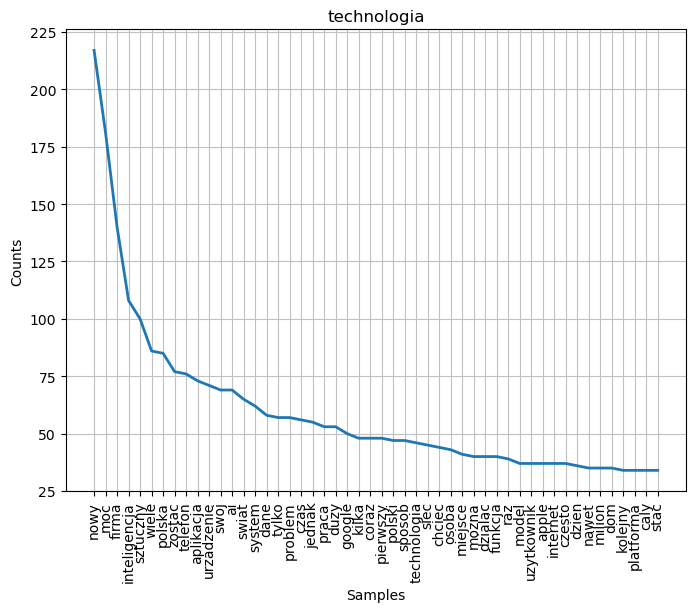

<FreqDist with 6397 samples and 19846 outcomes>


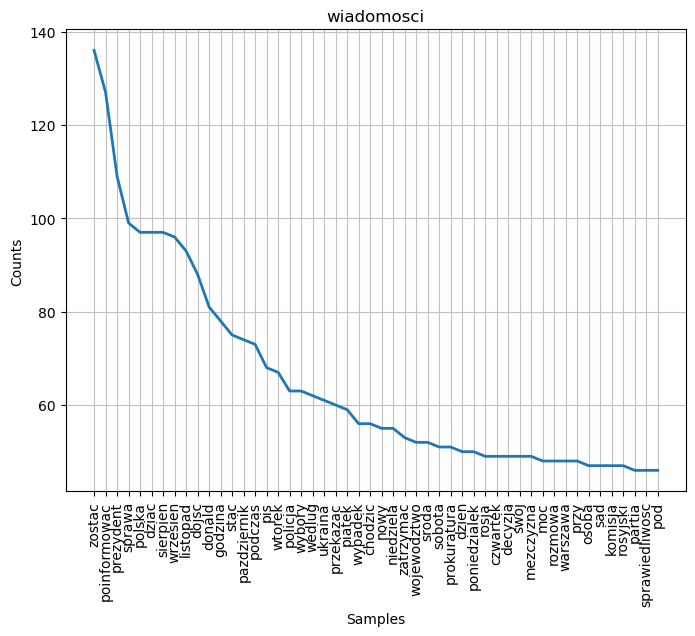

<FreqDist with 6105 samples and 20270 outcomes>


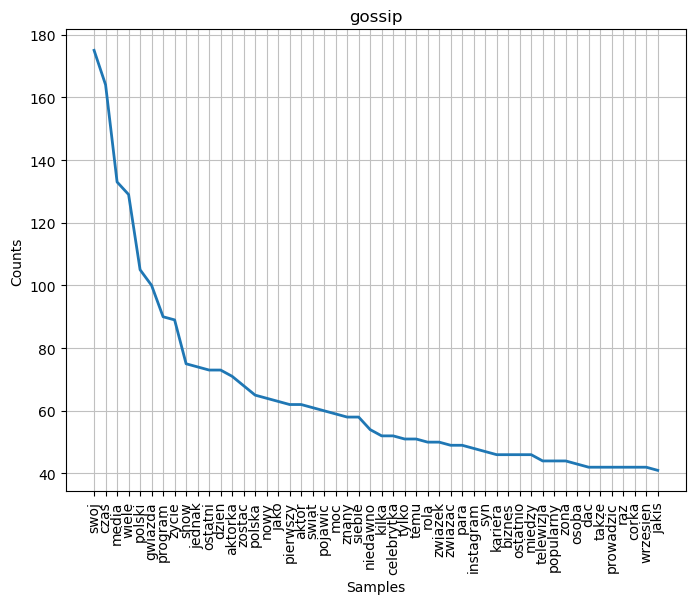

<FreqDist with 5789 samples and 20131 outcomes>


In [10]:
import nltk
import matplotlib.pyplot as plt

cleaned_data['category'] = cleaned_data['category'].replace('yapping', 'gossip')

for category in cleaned_data['category'].unique():
    # Concatenate all 'content' strings for the category
    all_text = ' '.join(cleaned_data[cleaned_data['category'] == category]['content'])
    words = all_text.split()
    catFD = nltk.FreqDist(words[:])
    plt.subplots(figsize=(8,6))
    plt.title(category)
    catFD.plot(50)
    plt.show()
    print(catFD)

In [15]:
print(len(cleaned_data))

16822


In [6]:
import pandas as pd

cleaned_data = pd.read_csv('../data/all_data.csv')
cleaned_data.dropna(inplace=True)
# cleaned_data = pd.read_csv('../data/cleaned_data_sampled.csv')
# count avg len of all rows in column content
avg_length = cleaned_data['content'].apply(len).mean()

print(f'Average length of all rows in the content column: {avg_length}')

avg_length_per_category = cleaned_data.groupby('category')['content'].apply(lambda x: x.str.len().mean())

print(avg_length_per_category)

Average length of all rows in the content column: 883.7314730100641
category
militaria       991.035702
sport          2508.136964
technologia     247.854909
wiadomosci      199.347914
yapping         198.924740
zdrowie         195.852341
Name: content, dtype: float64


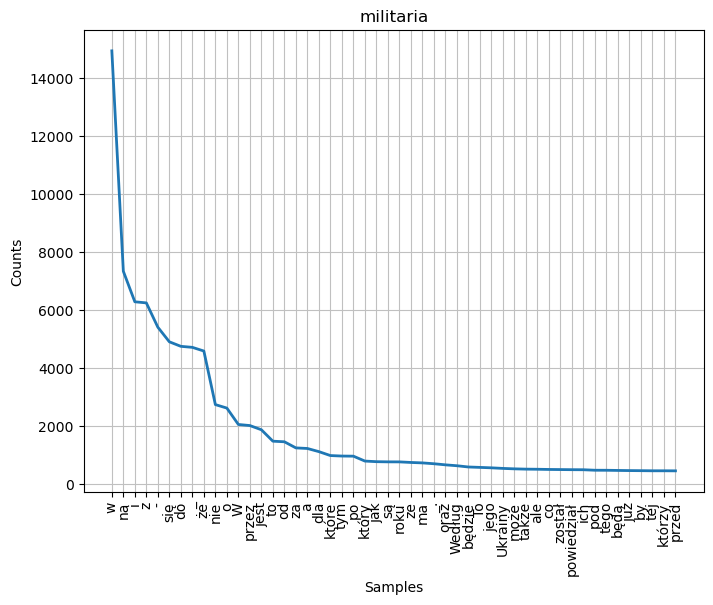

<FreqDist with 60813 samples and 391500 outcomes>


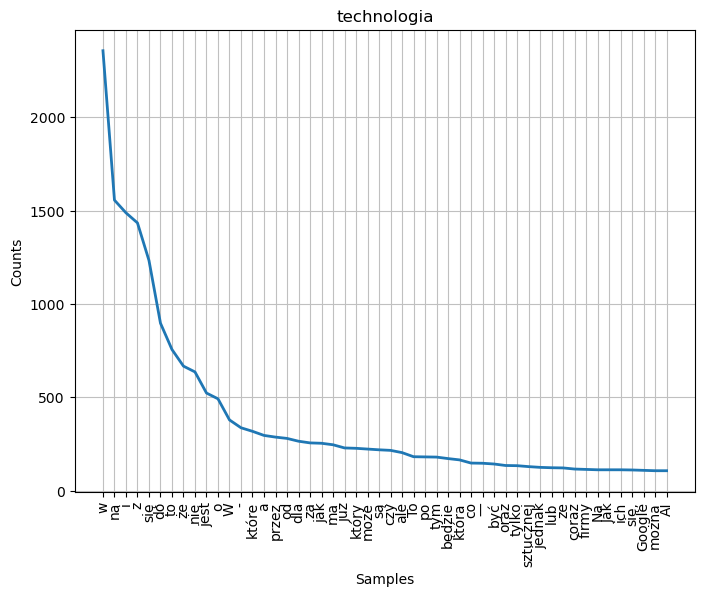

<FreqDist with 24814 samples and 80578 outcomes>


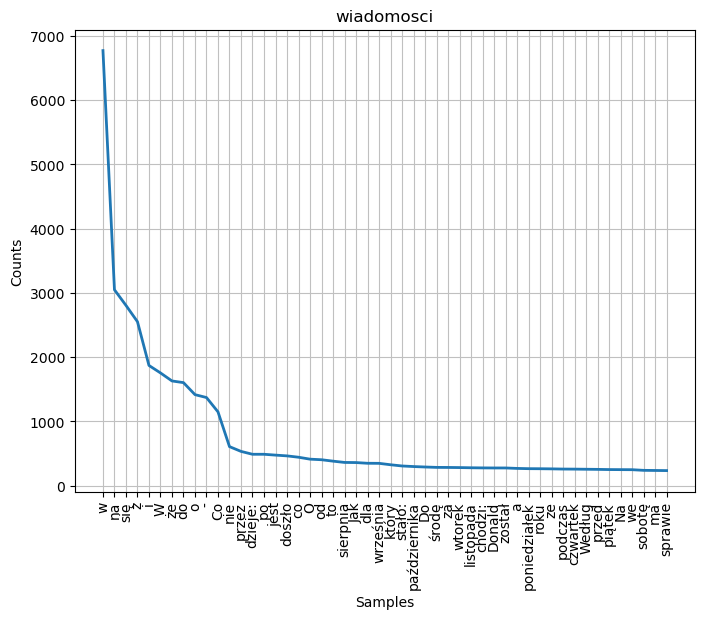

<FreqDist with 34729 samples and 152989 outcomes>


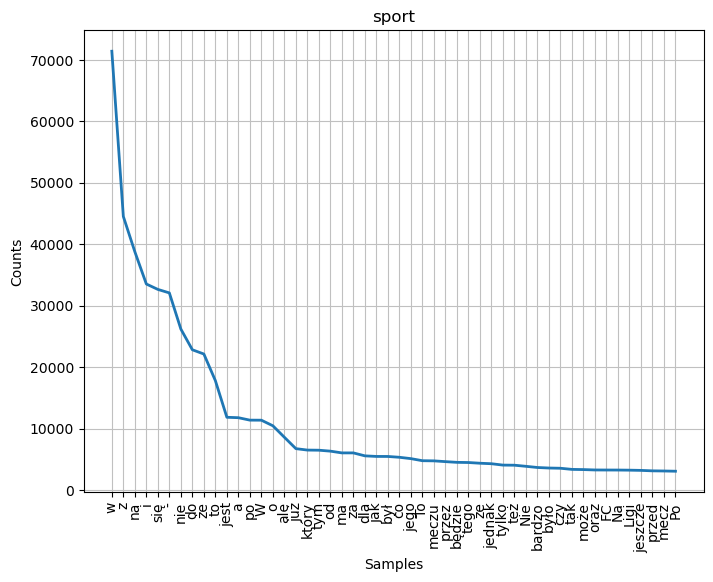

<FreqDist with 141804 samples and 2056051 outcomes>


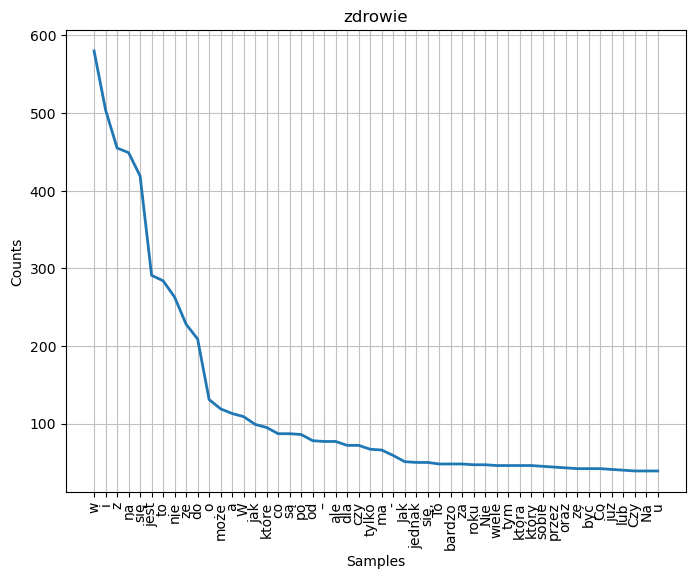

<FreqDist with 10212 samples and 24013 outcomes>


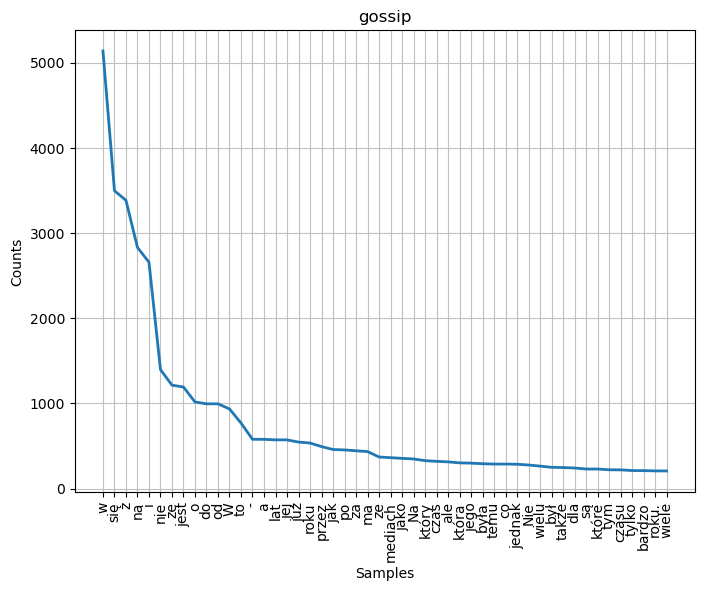

<FreqDist with 29183 samples and 147034 outcomes>


In [8]:
import nltk
import matplotlib.pyplot as plt

cleaned_data['category'] = cleaned_data['category'].replace('yapping', 'gossip')

for category in cleaned_data['category'].unique():
    # Concatenate all 'content' strings for the category
    all_text = ' '.join(cleaned_data[cleaned_data['category'] == category]['content'])
    words = all_text.split()
    catFD = nltk.FreqDist(words[:])
    plt.subplots(figsize=(8,6))
    plt.title(category)
    catFD.plot(50)
    plt.show()
    print(catFD)